# Part 1: Gradients example

This notebook is designed to illustrate the concept of the gradient.

Let $x \equiv \left[\begin{matrix} x_0 \\ x_1 \end{matrix}\right]$ be a two-dimensional vector, and let
$$
  f(x) \, \equiv \, x^T x \, = \, x_0^2 + x_1^2.
$$

**Exercise 0** (1 point). Implement the Python function, `f(x0, x1)`, so that it computes $f(x)$.

In [1]:
def f(x0, x1):
    return x0**2+x1**2

In [3]:
# Test cell: `f_test`

from numpy import sin, cos, vectorize, isclose
from numpy.random import randn

f_vec = vectorize(f)
theta = randn(1000)
assert all(isclose(f_vec(sin(theta), cos(theta)), 1.0))

print("\n(Passed!)")


(Passed!)


## The gradient

Let's create a mesh of $[x_0, x_1]$ coordinate values:

In [4]:
from numpy import linspace, meshgrid
x0 = linspace(-2, 2, 11)
x1 = linspace(-2, 2, 11)
X0, X1 = meshgrid(x0, x1)

In [5]:
print("X0:\n", X0)
print("X1:\n", X1)

X0:
 [[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]]
X1:
 [[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6]
 [-1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2]
 [-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
 [-0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 

Apply `f()` to each of the points in the mesh:

In [6]:
Z = f_vec(X0, X1)
print("Z:\n", Z)

Z:
 [[8.   6.56 5.44 4.64 4.16 4.   4.16 4.64 5.44 6.56 8.  ]
 [6.56 5.12 4.   3.2  2.72 2.56 2.72 3.2  4.   5.12 6.56]
 [5.44 4.   2.88 2.08 1.6  1.44 1.6  2.08 2.88 4.   5.44]
 [4.64 3.2  2.08 1.28 0.8  0.64 0.8  1.28 2.08 3.2  4.64]
 [4.16 2.72 1.6  0.8  0.32 0.16 0.32 0.8  1.6  2.72 4.16]
 [4.   2.56 1.44 0.64 0.16 0.   0.16 0.64 1.44 2.56 4.  ]
 [4.16 2.72 1.6  0.8  0.32 0.16 0.32 0.8  1.6  2.72 4.16]
 [4.64 3.2  2.08 1.28 0.8  0.64 0.8  1.28 2.08 3.2  4.64]
 [5.44 4.   2.88 2.08 1.6  1.44 1.6  2.08 2.88 4.   5.44]
 [6.56 5.12 4.   3.2  2.72 2.56 2.72 3.2  4.   5.12 6.56]
 [8.   6.56 5.44 4.64 4.16 4.   4.16 4.64 5.44 6.56 8.  ]]


Plot `Z[:, :]` as a three-dimensional surface:

Text(0,0.5,'x1')

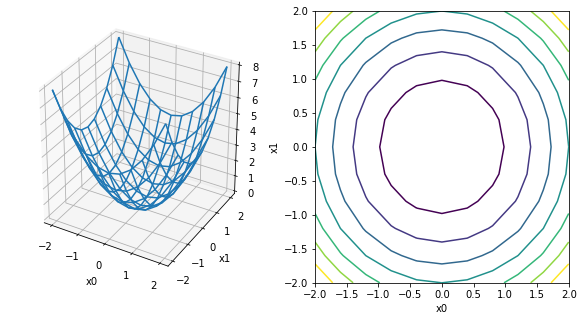

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure, xlabel, ylabel
%matplotlib inline

fig = figure(figsize=(10, 5))

ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_wireframe(X0, X1, Z)
xlabel('x0')
ylabel('x1')

ax2d = fig.add_subplot(122)
cp = ax2d.contour(X0, X1, Z)
xlabel('x0')
ylabel('x1')

The gradient of $f(x)$ with respect to $x$ is
$$
  \nabla_{\!x} \, f(x)
  \, \equiv \,
    \left[\begin{matrix}
       \dfrac{\partial f}{\partial x_0} \\
       \dfrac{\partial f}{\partial x_1}
    \end{matrix}\right]
  \, = \,
    \left[\begin{matrix}
      \dfrac{\partial}{\partial x_0} \left( x_0^2 + x_1^2 \right) \\
      \dfrac{\partial}{\partial x_1} \left( x_0^2 + x_1^2 \right)
    \end{matrix}\right]
  \, = \,
    \left[\begin{matrix}
      2 x_0 \\
      2 x_1
    \end{matrix}\right].
$$

**Exercise 1** (1 point). Implement a function, `grad_f(x0, x1)`, that implements the gradient $\nabla_{\!x} \, f(x)$ shown above. It should return a pair of values since the gradient for this $f(x)$ has two components.

In [10]:
def grad_f(x0, x1):
    return x0*2, x1*2


In [11]:
# Test cell: `grad_f_test`

grad_f_vec = vectorize(grad_f)
z = randn(5)
gx, gy = grad_f_vec(z, -z)
assert all(isclose(gx*0.5, z)) and all(isclose(gy*(-0.5), z)), "Your function might have a bug..."

print("\n(Passed!)")


(Passed!)


## Visualizing the gradient

Let's generate and plot $\nabla_{\!x} \, f(x)$:

(-2.0, 2.0, -2.0, 2.0)

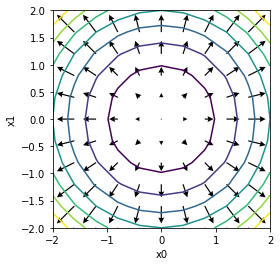

In [12]:
dX0, dX1 = grad_f(X0, X1)

from matplotlib.pyplot import contour, quiver, axis
cp = contour (X0, X1, Z)
quiver(X0, X1, dX0, dX1, scale=40, headwidth=5)
xlabel('x0')
ylabel('x1')
axis('square')

**Fin!** If you've gotten this far without errors, your notebook is ready to submit.